In [64]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the CSV data
file_path = 'RunningData.csv'  # Replace with your actual file path

try:
    # Read the file with the first row as column names
    print("Attempting to read the file with the first row as column names:")
    df = pd.read_csv(file_path, header=0)  # First row is used as header
    print("Preview of raw data:")
    print(df.head(10))  # Print the first 10 rows to check structure

except Exception as e:
    print(f"An error occurred while reading the file: {e}")

# Proceed only if the DataFrame is loaded successfully
if df is not None and not df.empty:
    # Step 3: Clean and process the DataFrame
    # Strip any leading/trailing whitespace from column names
    df.columns = df.columns.str.strip()

    # Check column names after cleaning
    print("Column names after stripping whitespace:", df.columns)

    # Define the cleaning function for time format
    def clean_time_format(time_str):
        if pd.isna(time_str):
            return time_str  # Return NaN as is
        parts = time_str.split(':')
        # If there are only two components (mm:ss), add "00:" in front
        if len(parts) == 2:
            return f"00:{time_str}"
        # If there are three components (hh:mm:ss), return as is
        return time_str

    # Apply the cleaning function to the 'Time' column
    if 'Time' in df.columns:
        df['Cleaned Time'] = df['Time'].apply(clean_time_format)
    else:
        print("Column 'Time' is missing. Skipping time-related processing.")

    # Create a new column for Total Seconds (handling the new logic for minutes/hours determination)
def calculate_total_seconds(time_str):
    if pd.isna(time_str):
        return None  # Return None for NaN

    parts = time_str.split(':')
    
    # Case 1: If the first part is greater than or equal to 4, we assume it's hh:mm:ss format
    if len(parts) == 3:
        first_part = int(parts[0])  # The first part (minutes or hours)
        
        # If the first part is greater than or equal to 4, treat it as hours:minutes:seconds
        if first_part <= 4:
            hours, minutes, seconds = map(int, parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
        else:
            # Otherwise, it's in mm:ss:SSS format (minutes:seconds:milliseconds)
            minutes, seconds, milliseconds = map(int, parts)
            total_seconds = minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    
    # If the format doesn't match, return None
    return None

# Apply the cleaning function to the 'Cleaned Time' column
if 'Cleaned Time' in df.columns:
    df['Total Seconds'] = df['Cleaned Time'].apply(calculate_total_seconds)

# Check the DataFrame with the new columns
if 'Total Seconds' in df.columns:
    print("Preview of updated DataFrame with new columns:")
    print(df[['Time', 'Cleaned Time', 'Total Seconds']])

    if 'Cleaned Time' in df.columns:
        df['Total Seconds'] = df['Cleaned Time'].apply(calculate_total_seconds)

    # Check the DataFrame with the new columns
    if 'Total Seconds' in df.columns:
        print("Preview of updated DataFrame with new columns:")
        print(df[['Time', 'Cleaned Time', 'Total Seconds']])

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Convert necessary columns to appropriate data types
    if 'Distance' in df.columns:
        df['Distance'] = df['Distance'].str.replace(' mi', '').astype(float)
    else:
        print("Column 'Distance' is missing. Skipping distance conversion.")

    if 'Heart Rate' in df.columns:
        df['Heart Rate'] = df['Heart Rate'].astype(int)
    else:
        print("Column 'Heart Rate' is missing. Skipping heart rate conversion.")

    # # Final DataFrame preview
    # print("Final processed DataFrame:")
    # print(df.head())

    # Step 4: Calculate pace in miles per hour
    def calculate_pace(df):
        """
        Calculates the pace in miles per hour (mph) for each row in the DataFrame.

        Args:
            df (pd.DataFrame): DataFrame containing running data with 'Total Seconds' and 'Distance' columns.

        Returns:
            pd.DataFrame: DataFrame with a new column 'Pace (mph)' representing the pace in miles per hour.
        """
        # Ensure that the required columns are available
        if 'Total Seconds' not in df.columns or 'Distance' not in df.columns:
            print("Missing necessary columns for pace calculation.")
            return df
        
        # Calculate pace in miles per hour: pace = distance (in miles) / time (in hours)
        # Convert Total Seconds to hours by dividing by 3600 (seconds in an hour)
        df['Pace (mph)'] = df['Distance'] / (df['Total Seconds'] / 3600)
        
        return df

    # Apply the pace calculation function to the DataFrame
    if df is not None:
        df = calculate_pace(df)

        # Check the DataFrame with the new 'Pace (mph)' column
        print("\nDataFrame with calculated pace:")
        print(df[['Distance', 'Total Seconds', 'Pace (mph)']].head())

else:
    print("Data loading failed or resulted in an empty DataFrame. Check the file content and delimiter.")




Attempting to read the file with the first row as column names:
Preview of raw data:
  Sport             Date                  Title      Time Distance  Elevation  \
0   Run  Tue, 12/17/2024          Detached pt 2  57:20:00   7.25 mi    127 ft   
1   Run  Mon, 12/16/2024               Detached   1:16:09  10.00 mi    236 ft   
2   Run  Sun, 12/15/2024                   Sore  47:15:00   4.34 mi     92 ft   
3   Run  Sat, 12/14/2024  808’s and Heartbreaks   1:25:21  10.50 mi    261 ft   
4   Run  Thu, 12/12/2024               Recovery   1:19:40   8.00 mi    286 ft   
5   Run  Wed, 12/11/2024                Sun Run   1:04:44   8.10 mi    215 ft   
6   Run  Tue, 12/10/2024   Warm Up for PL Final   1:11:46   8.10 mi    310 ft   
7   Run   Mon, 12/9/2024                  Tired  57:23:00   7.00 mi    124 ft   
8   Run   Sun, 12/8/2024         No Recognition   1:05:48   7.12 mi    127 ft   
9   Run   Sat, 12/7/2024                   Peak   1:42:38  13.13 mi    289 ft   

   Heart Rate  Pace   


In [65]:
# Step 5: Calculate pace in miles per hour

def calculate_pace(df):
    """
    Calculates the pace in miles per hour (mph) for each row in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing running data with 'Total Seconds' and 'Distance' columns.

    Returns:
        pd.DataFrame: DataFrame with a new column 'Pace (mph)' representing the pace in miles per hour.
    """
    # Ensure that the required columns are available
    if 'Total Seconds' not in df.columns or 'Distance' not in df.columns:
        print("Missing necessary columns for pace calculation.")
        return df
    
    # Calculate pace in miles per hour: pace = distance (in miles) / time (in hours)
    # Convert Total Seconds to hours by dividing by 3600 (seconds in an hour)
    df['Pace (mph)'] = df['Distance'] / (df['Total Seconds'] / 3600)
    
    return df

# Apply the pace calculation function to the DataFrame
if df is not None:
    df = calculate_pace(df)

    # Check the DataFrame with the new 'Pace (mph)' column
    print("\nDataFrame with calculated pace:")
    print(df[['Distance', 'Total Seconds', 'Pace (mph)']].head())




DataFrame with calculated pace:
   Distance  Total Seconds  Pace (mph)
0      7.25         3440.0    7.587209
1     10.00         4569.0    7.879186
2      4.34         2835.0    5.511111
3     10.50         5121.0    7.381371
4      8.00         4780.0    6.025105


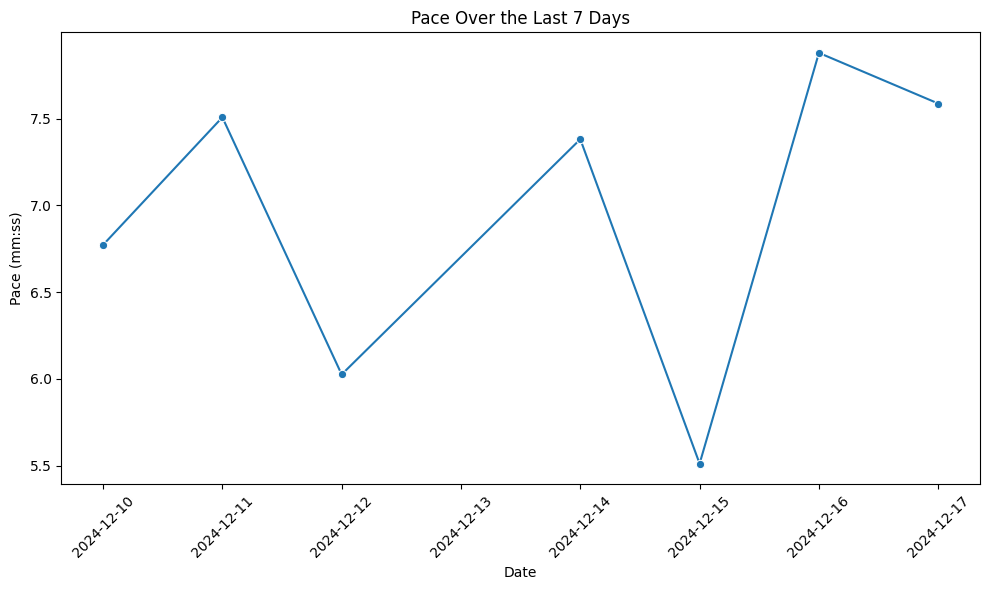

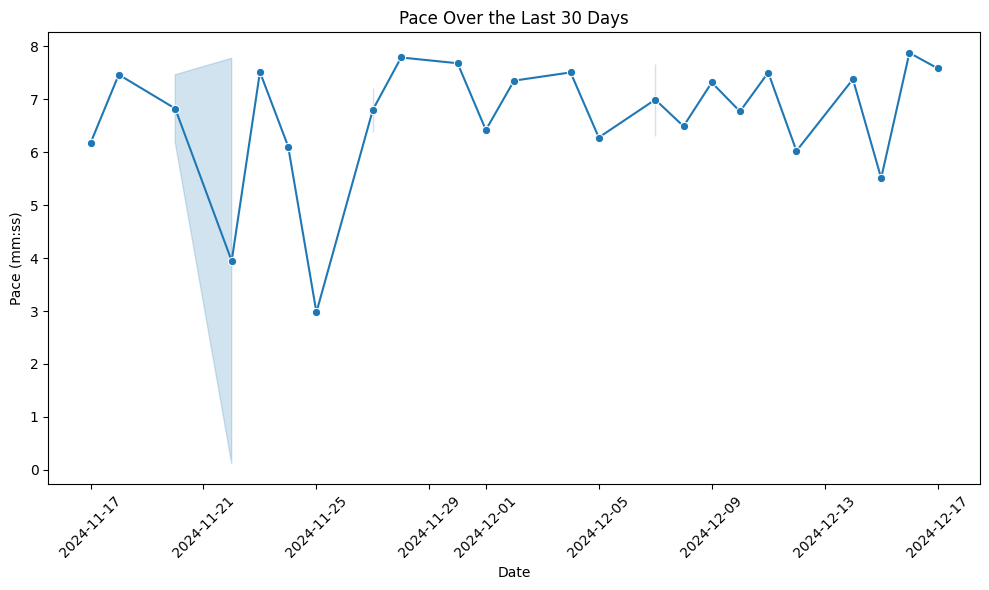

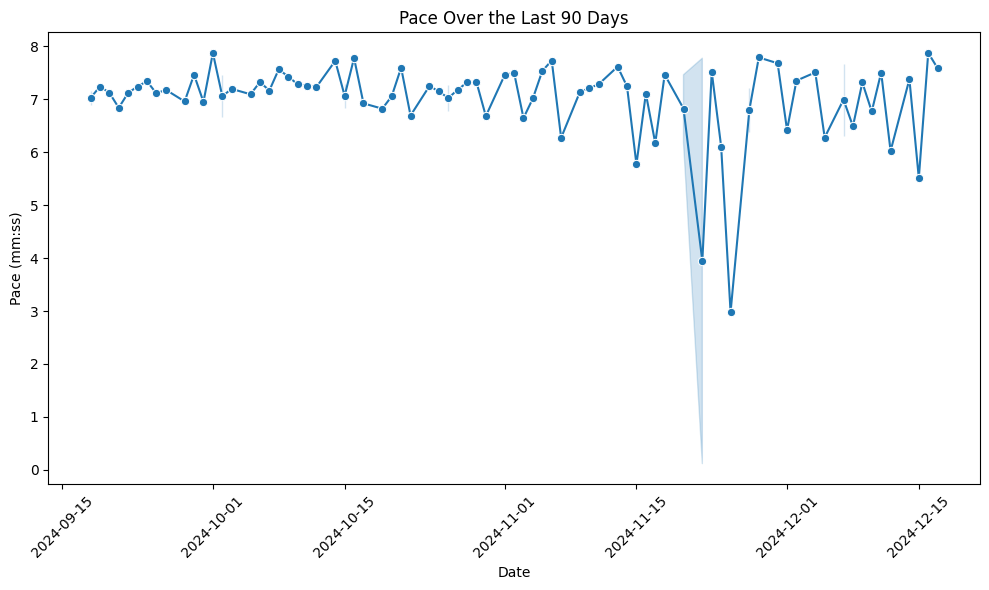

  Sport       Date                  Title      Time  Distance Elevation  \
6   Run 2024-12-10   Warm Up for PL Final   1:11:46      8.10    310 ft   
5   Run 2024-12-11                Sun Run   1:04:44      8.10    215 ft   
4   Run 2024-12-12               Recovery   1:19:40      8.00    286 ft   
3   Run 2024-12-14  808’s and Heartbreaks   1:25:21     10.50    261 ft   
2   Run 2024-12-15                   Sore  47:15:00      4.34     92 ft   
1   Run 2024-12-16               Detached   1:16:09     10.00    236 ft   
0   Run 2024-12-17          Detached pt 2  57:20:00      7.25    127 ft   

   Heart Rate  Pace Cleaned Time  Total Seconds  Pace (mph)  
6         171   NaN      1:11:46         4306.0    6.771946  
5         183   NaN      1:04:44         3884.0    7.507724  
4         166   NaN      1:19:40         4780.0    6.025105  
3         184   NaN      1:25:21         5121.0    7.381371  
2         152   NaN     47:15:00         2835.0    5.511111  
1         189   NaN      1:

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure 'Date' is in datetime format and sort the DataFrame by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Get the most recent date in the DataFrame
most_recent_date = df['Date'].max()

# Function to filter data for the last X days
def filter_last_days(df, days):
    return df[df['Date'] >= most_recent_date - pd.Timedelta(days=days)]

# 1. Pace Over the Last 7 Days
last_7_days = filter_last_days(df, 7)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_7_days, marker='o')
plt.title('Pace Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pace Over the Last 30 Days
last_30_days = filter_last_days(df, 30)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_30_days, marker='o')
plt.title('Pace Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Pace Over the Last 90 Days
last_90_days = filter_last_days(df, 90)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_90_days, marker='o')
plt.title('Pace Over the Last 90 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(last_7_days)

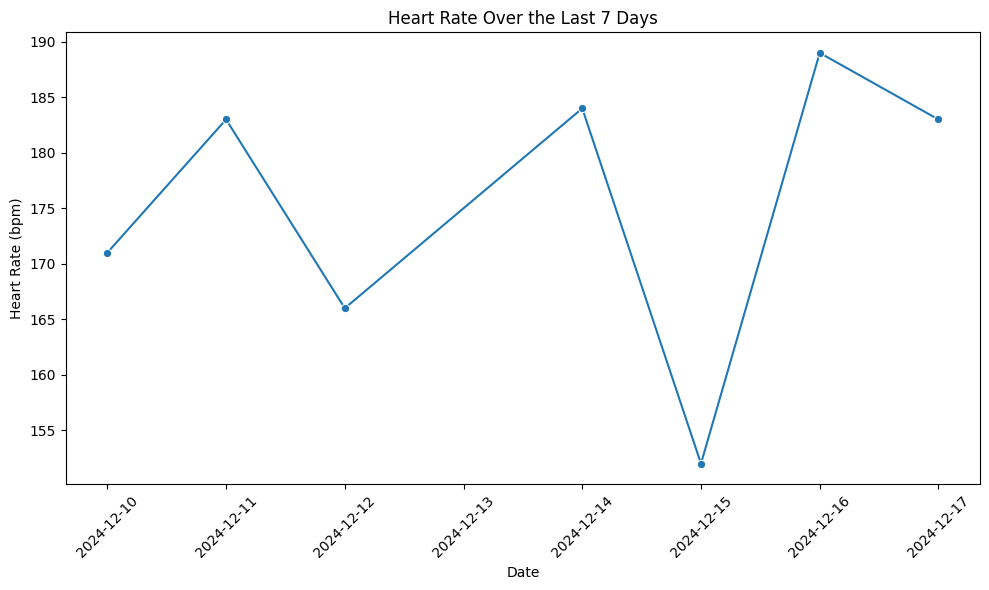

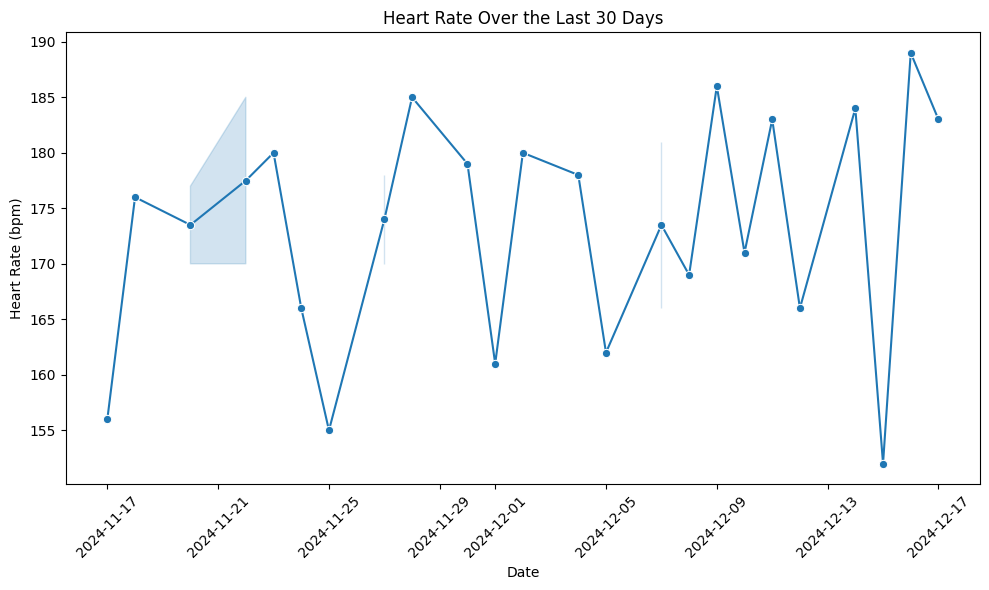

In [67]:
# 1. Heart Rate Over the Last 7 Days
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Heart Rate', data=last_7_days, marker='o')
plt.title('Heart Rate Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heart Rate Over the Last 30 Days
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Heart Rate', data=last_30_days, marker='o')
plt.title('Heart Rate Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


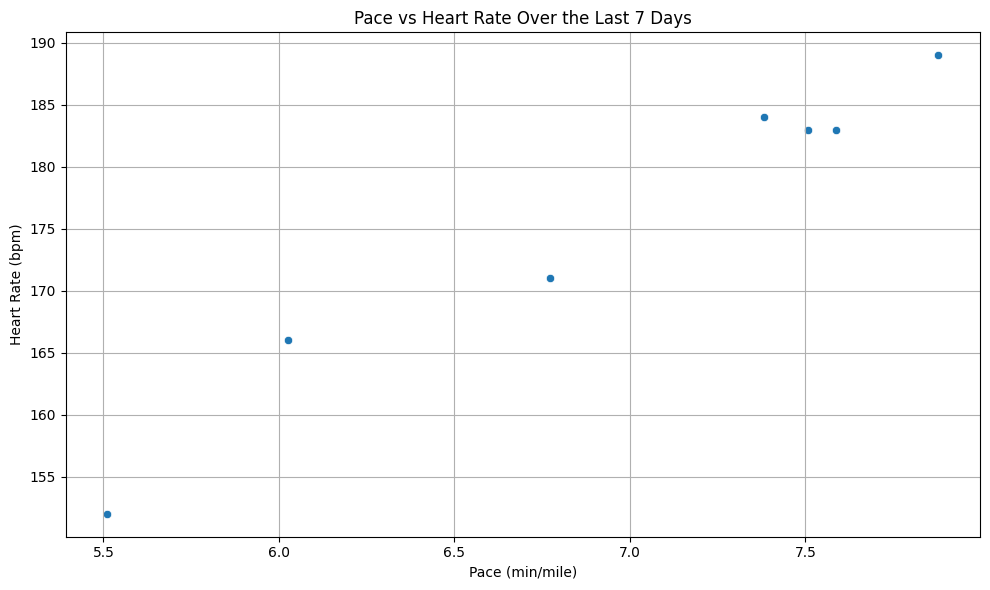

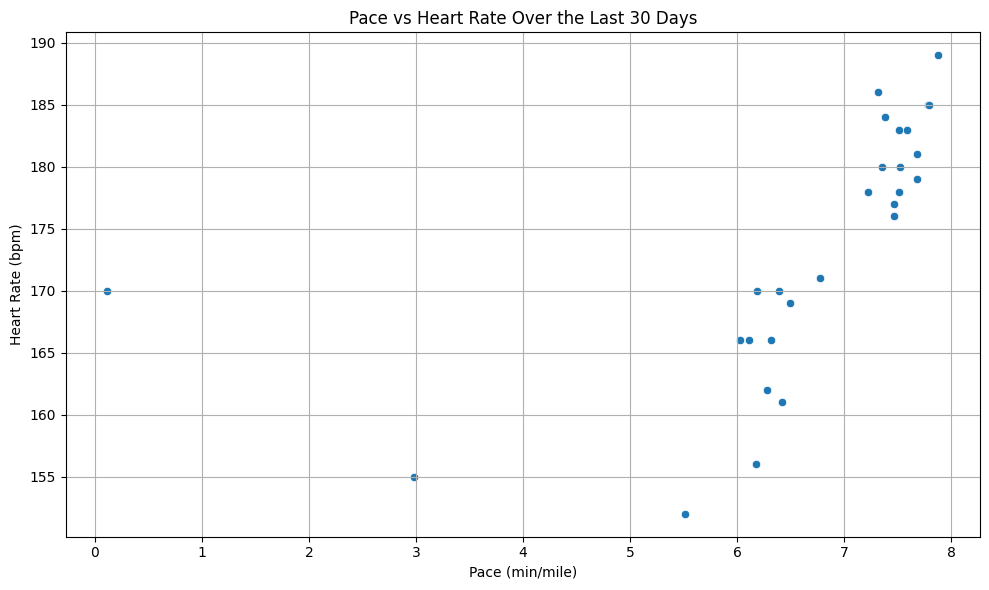

In [31]:
import matplotlib.pyplot as plt

# Scatter Plot: Pace vs Heart Rate for the Last 7 Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pace (mph)', y='Heart Rate', data=last_7_days)
plt.title('Pace vs Heart Rate Over the Last 7 Days')
plt.xlabel('Pace (min/mile)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Pace vs Heart Rate for the Last 30 Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pace (mph)', y='Heart Rate', data=last_30_days)
plt.title('Pace vs Heart Rate Over the Last 30 Days')
plt.xlabel('Pace (min/mile)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()


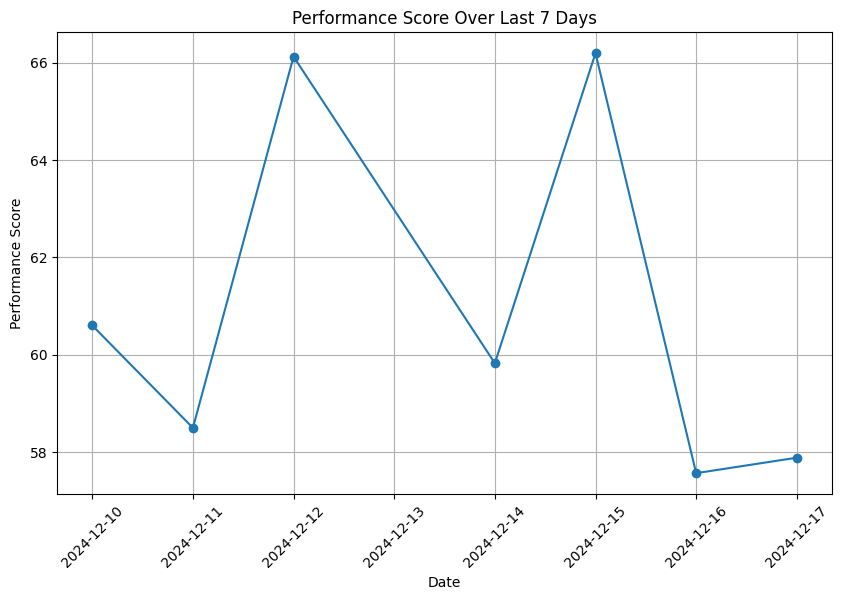

/tmp/ipykernel_15540/926197954.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_7_days['Performance Score'] = last_7_days.apply(


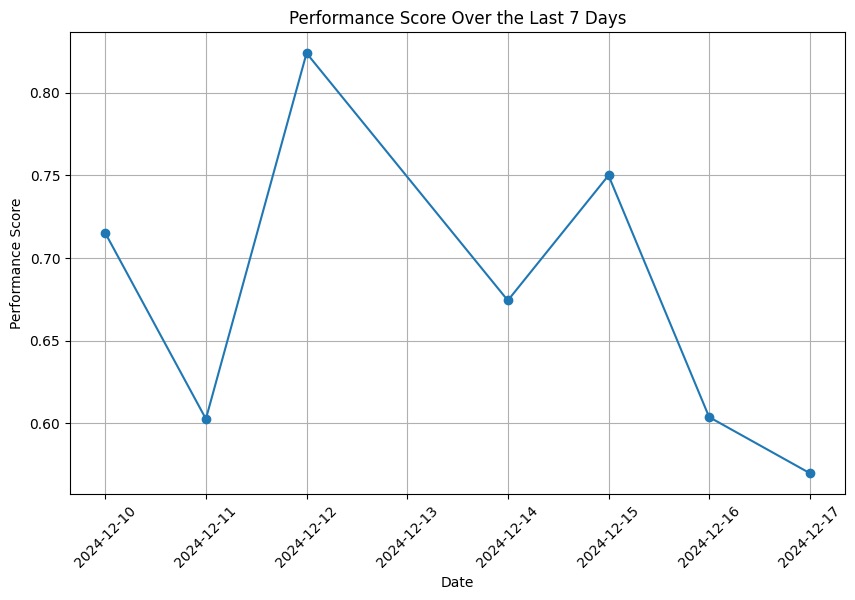

In [68]:
# Step 1: Calculate Performance Metric
df['Performance Score'] = 2.4 * (df['Heart Rate'] / df['Pace (mph)'])

# Step 2: Filter the last 7, 30, and 90 days
last_7_days = df.tail(7)
last_30_days = df.tail(30)

# Plot for the last 7 days
plt.figure(figsize=(10, 6))
plt.plot(last_7_days['Date'], last_7_days['Performance Score'], marker='o')
plt.title('Performance Score Over Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Adjusted performance score function to include distance
def calculate_performance_score(pace, heart_rate, distance):
    if pace == 0 or heart_rate == 0:
        return None  # Handle division by zero
    # Factor in distance with log scaling
    performance_score = 500 * (1 / pace) * (1 / heart_rate) * (np.log(distance + 1) * 0.75)
    return performance_score 

# Apply the performance score function to the past 7 days
last_7_days['Performance Score'] = last_7_days.apply(
    lambda row: calculate_performance_score(row['Pace (mph)'], row['Heart Rate'], row['Distance']), axis=1)

# Plot the performance score for the past 7 days
plt.figure(figsize=(10, 6))
plt.plot(last_7_days['Date'], last_7_days['Performance Score'], marker='o')
plt.title('Performance Score Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot for the last 30 days
# plt.figure(figsize=(10, 6))
# plt.plot(last_30_days['Date'], last_30_days['Performance Score'], marker='o')
# plt.title('Performance Score Over Last 30 Days')
# plt.xlabel('Date')
# plt.ylabel('Performance Score')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

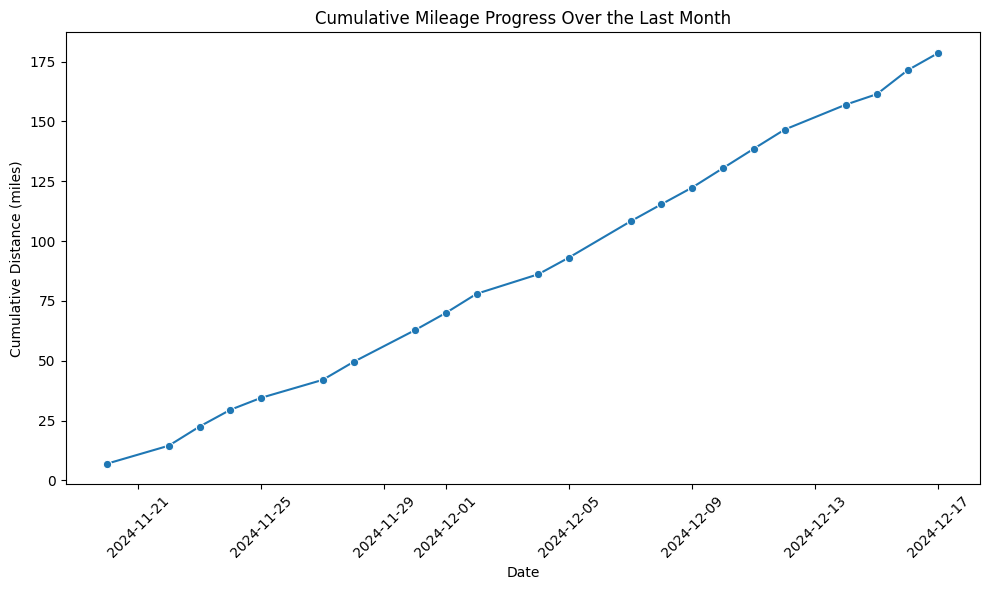

         Date  Distance  Cumulative Mileage
0  2024-11-20      7.00                7.00
1  2024-11-22      7.50               14.50
2  2024-11-23      8.00               22.50
3  2024-11-24      7.00               29.50
4  2024-11-25      5.01               34.51
5  2024-11-27      7.50               42.01
6  2024-11-28      7.50               49.51
7  2024-11-30     13.30               62.81
8  2024-12-01      7.18               69.99
9  2024-12-02      8.00               77.99
10 2024-12-04      8.15               86.14
11 2024-12-05      7.00               93.14
12 2024-12-07     15.13              108.27
13 2024-12-08      7.12              115.39
14 2024-12-09      7.00              122.39
15 2024-12-10      8.10              130.49
16 2024-12-11      8.10              138.59
17 2024-12-12      8.00              146.59
18 2024-12-14     10.50              157.09
19 2024-12-15      4.34              161.43
20 2024-12-16     10.00              171.43
21 2024-12-17      7.25         

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and 'Date' is in datetime format, and 'Distance' is in numeric format

# Ensure 'Distance' is in numeric format
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Drop rows with missing 'Distance' or 'Date' values
df = df.dropna(subset=['Distance', 'Date'])

# Filter data for the past 3 months
three_months_ago = pd.to_datetime('today') - pd.DateOffset(months=1)
df_last_3_months = df[df['Date'] >= three_months_ago]

# Group by date and sum the distance for each day
daily_mileage = df_last_3_months.groupby('Date')['Distance'].sum().reset_index()

# Sort by date
daily_mileage = daily_mileage.sort_values('Date')

# Create a cumulative sum of the mileage
daily_mileage['Cumulative Mileage'] = daily_mileage['Distance'].cumsum()

# Plotting the cumulative mileage over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cumulative Mileage', data=daily_mileage, marker='o')
plt.title('Cumulative Mileage Progress Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily mileage data for review
print(daily_mileage)

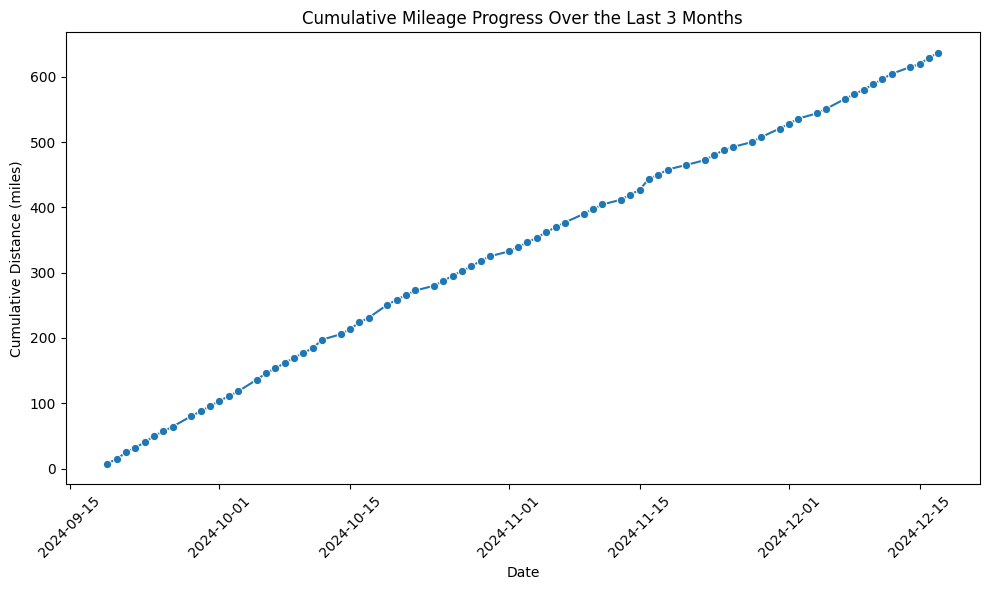

         Date  Distance  Cumulative Mileage
0  2024-09-19      7.48                7.48
1  2024-09-20      7.10               14.58
2  2024-09-21     10.01               24.59
3  2024-09-22      7.28               31.87
4  2024-09-23      8.00               39.87
..        ...       ...                 ...
70 2024-12-12      8.00              604.45
71 2024-12-14     10.50              614.95
72 2024-12-15      4.34              619.29
73 2024-12-16     10.00              629.29
74 2024-12-17      7.25              636.54

[75 rows x 3 columns]


In [70]:
# Assuming df is already loaded and 'Date' is in datetime format, and 'Distance' is in numeric format

# Ensure 'Distance' is in numeric format
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Drop rows with missing 'Distance' or 'Date' values
df = df.dropna(subset=['Distance', 'Date'])

# Filter data for the past 3 months
three_months_ago = pd.to_datetime('today') - pd.DateOffset(months=3)
df_last_3_months = df[df['Date'] >= three_months_ago]

# Group by date and sum the distance for each day
daily_mileage = df_last_3_months.groupby('Date')['Distance'].sum().reset_index()

# Sort by date
daily_mileage = daily_mileage.sort_values('Date')

# Create a cumulative sum of the mileage
daily_mileage['Cumulative Mileage'] = daily_mileage['Distance'].cumsum()

# Plotting the cumulative mileage over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cumulative Mileage', data=daily_mileage, marker='o')
plt.title('Cumulative Mileage Progress Over the Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily mileage data for review
print(daily_mileage)